In [70]:
# importando a biblioteca e os dados.
import pandas as pd
dados_originais = pd.read_csv('clients_data.csv')
dados_originais.tail()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1995,2668,2029-06-18,700,2323,4865.08,Web,CA,18.5,17
1996,1147,2029-06-19,2637,1281,1115.04,Tablet,BR,70.6,66
1997,7420,2029-06-20,3312,79,4029.99,Tablet,UK,49.6,104
1998,1365,2029-06-21,1388,2114,300.79,Tablet,UK,59.8,5
1999,5531,2029-06-22,3684,1415,4606.60,Mobile,US,68.9,123


# Eliminando clientes inativos
nessa etapa vamos criar um filtro para elimitar clientes inativos, de acordo com a regra de negócio clientes inativos são clientes que os acessos foram feitos antes do ano de 2025

In [71]:
df_clientes_ativos = dados_originais[dados_originais['date'] > '2024-12-31']
df_clientes_ativos = df_clientes_ativos.sort_values(by='date')
df_clientes_ativos.head(5)

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
366,2150,2025-01-01,3063,149,603.92,Web,BR,73.5,4
367,8560,2025-01-02,1831,1504,353.95,Web,JP,31.3,23
368,2931,2025-01-03,2641,96,2422.91,Mobile,CA,48.0,29
369,2664,2025-01-04,2746,1721,1108.25,Mobile,UK,11.4,98
370,2081,2025-01-05,4008,2240,1277.38,Web,BR,46.5,149


In [72]:
# possuímos atualmente 1634 clientes ativos cadastrados!
df_clientes_ativos['client_id'].count()

np.int64(1634)

# Agrupando clientes por plataforma
como nossa análise vai ser segmentada, vamos separar os clientes por grupos de dispositivos. ['Web', 'Mobile', 'Tablet'].

In [73]:
df_tablet = df_clientes_ativos[df_clientes_ativos['platform_type'] == 'Tablet']
df_tablet = df_tablet.sort_values(by=['revenue'])

In [74]:
df_mobile = df_clientes_ativos[df_clientes_ativos['platform_type'] == 'Mobile']
df_mobile['client_id'].count()

np.int64(579)

In [75]:
df_web = df_clientes_ativos[df_clientes_ativos['platform_type'] == 'Web']
df_web['client_id'].count()

np.int64(506)

# Eliminando outliers
É de suma importancia eliminar dados que ''fogem da realidade'', então vamos isolar alguns casos no qual chamamos de outliers, já que será feita uma análise estatística esse tipo de dado pode interferir nos resultados finais.

Método utilizado: IQR - Uso do intervalo interquartil
é uma medida estatística que descreve a dispersão dos dados, ou seja, a distância entre o primeiro quartil (Q1) e o terceiro quartil (Q3) de um conjunto de dados
IQR=Q3−Q1


In [76]:
pd.set_option('display.width', 1000)  # Um valor bem alto evita a quebra de colunas

Vamos usar a coluna lucro para retirar dados dos clientes que lucram muito acima do normal ou muito abaixo.

In [77]:
# Tablets

q1_tablet = df_tablet['revenue'].quantile(0.25)
q3_tablet = df_tablet['revenue'].quantile(0.75)
iqr_tablet = q3_tablet - q1_tablet

tablet_limite_inferior = q1_tablet - 1.5 * iqr_tablet
tablet_limite_superior = q3_tablet + 1.5 * iqr_tablet

df_tablet_sem_outliers = df_tablet[(df_tablet['revenue'] >= tablet_limite_inferior) & (df_tablet['revenue'] <= tablet_limite_superior)]
df_tablet_sem_outliers = df_tablet_sem_outliers.sort_values(by='revenue', ascending=False)
df_tablet_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1368,9707,2027-09-30,2823,54,4997.34,Tablet,BR,78.0,88
455,4766,2025-03-31,2504,1368,4995.26,Tablet,BR,35.8,126
564,2353,2025-07-18,4407,1667,4991.61,Tablet,UK,62.3,32
488,6161,2025-05-03,1193,995,4991.02,Tablet,CA,79.5,114
567,8575,2025-07-21,3501,1651,4973.93,Tablet,DE,10.7,96


In [78]:
# Mobile
q1_mobile = df_mobile['revenue'].quantile(0.25)
q3_mobile = df_mobile['revenue'].quantile(0.75)
iqr_mobile = q3_mobile - q1_mobile

mobile_limite_inferior = q1_mobile - 1.5 * iqr_mobile
mobile_limite_superior = q1_mobile + 1.5 * iqr_mobile

df_mobile_sem_outliers = df_mobile[(df_mobile['revenue'] >= mobile_limite_inferior) & (df_mobile['revenue'] <= mobile_limite_superior)]
df_mobile_sem_outliers = df_mobile_sem_outliers.sort_values(by='revenue', ascending=False)
df_mobile_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
702,6585,2025-12-03,1641,847,4677.77,Mobile,DE,56.6,17
822,3824,2026-04-02,3538,797,4675.12,Mobile,CA,51.4,4
514,9691,2025-05-29,4639,1953,4658.08,Mobile,JP,71.4,7
1555,6543,2028-04-04,1141,1289,4649.66,Mobile,JP,11.7,4
427,7748,2025-03-03,985,2165,4648.95,Mobile,UK,18.7,12


In [79]:
# Web
q1_web = df_web['revenue'].quantile(0.25)
q3_web = df_web['revenue'].quantile(0.75)
iqr_web = q3_web - q1_web

web_limite_inferior = q1_web - 1.5 * iqr_mobile
web_limite_superior= q3_web + 1.5 * iqr_mobile

df_web_sem_outliers = df_web[(df_web['revenue'] >= web_limite_inferior) & (df_web['revenue'] <= web_limite_superior)]
df_web_sem_outliers = df_web_sem_outliers.sort_values(by='revenue', ascending=False)
df_web_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1115,7212,2027-01-20,4579,181,4999.25,Web,FR,14.9,50
870,6567,2026-05-20,3284,1744,4989.91,Web,BR,62.2,99
1959,3672,2029-05-13,4496,1035,4984.07,Web,CA,75.2,137
1080,8141,2026-12-16,4075,1563,4978.14,Web,JP,31.3,118
1071,7809,2026-12-07,3814,1562,4967.96,Web,BR,11.7,62


## Clientes com alta rejeição
Vamos trabalhar com os clientes que possuem uma taxa de rejeiçäo alta, vamos filtrar aqueles nos quais 65% do público deixou a plataforma sem exercer ou interagir com nenhum tipo de conversão.

In [80]:
df_tablet_sem_outliers = df_tablet_sem_outliers[(df_tablet_sem_outliers['bounce_rate'] > 65)]
df_tablet_sem_outliers = df_tablet_sem_outliers.sort_values(by='bounce_rate', ascending=False)
df_tablet_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1012,4310,2026-10-09,2055,807,1195.42,Tablet,JP,79.8,42
1948,3355,2029-05-02,1255,223,390.75,Tablet,US,79.8,19
488,6161,2025-05-03,1193,995,4991.02,Tablet,CA,79.5,114
969,1966,2026-08-27,2238,1610,2910.79,Tablet,FR,79.4,63
1137,2252,2027-02-11,208,1600,533.13,Tablet,DE,79.4,61


In [81]:
df_mobile_sem_outliers = df_mobile_sem_outliers[(df_mobile_sem_outliers['bounce_rate'] > 65)]
df_mobile_sem_outliers = df_mobile_sem_outliers.sort_values(by='bounce_rate', ascending=False)
df_mobile_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1319,7150,2027-08-12,3882,2400,4246.73,Mobile,FR,80.0,15
879,2120,2026-05-29,4724,625,4496.13,Mobile,FR,80.0,115
1657,4712,2028-07-15,3328,849,3325.61,Mobile,DE,79.9,104
784,5324,2026-02-23,3885,21,1006.15,Mobile,JP,79.9,50
728,1364,2025-12-29,3465,1883,471.72,Mobile,JP,79.8,103


In [82]:
df_web_sem_outliers = df_web_sem_outliers[(df_web_sem_outliers['bounce_rate'] > 65 )]
df_web_sem_outliers = df_web_sem_outliers.sort_values(by='bounce_rate', ascending=False)
df_web_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1217,3032,2027-05-02,993,1705,3494.71,Web,UK,80.0,112
1170,5873,2027-03-16,3802,349,62.65,Web,BR,79.8,72
1547,3278,2028-03-27,1863,711,4863.72,Web,FR,79.5,43
1096,5225,2027-01-01,3166,1575,806.10,Web,UK,78.9,143
1699,4610,2028-08-26,2522,74,84.96,Web,CA,78.8,137


In [83]:
df_tablet_sem_outliers['client_id'].count()


np.int64(104)

In [84]:
df_mobile_sem_outliers['client_id'].count()

np.int64(114)

In [ ]:
df_web_sem_outliers['client_id'].count()


np.int64(112)

## Agrupando por região
vamos agrupar os dados por região e as demais colunas vamos preencher com a moda, mas antes vamos remover a coluna data e client_id pois elas não serão mais úteis nessa etapa em específico daqui para frente.

In [86]:
df_tablet_sem_outliers_limpa = df_tablet_sem_outliers.drop(columns=['date' , 'client_id'])
df_mobile_sem_outliers = df_mobile_sem_outliers.drop(columns=['date' , 'client_id'])
df_web_sem_outliers = df_web_sem_outliers.drop(columns=['date' , 'client_id'])

In [87]:
df_tablet_sem_outliers_limpa.head(5)

,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1012,2055,807,1195.42,Tablet,JP,79.8,42
1948,1255,223,390.75,Tablet,US,79.8,19
488,1193,995,4991.02,Tablet,CA,79.5,114
969,2238,1610,2910.79,Tablet,FR,79.4,63
1137,208,1600,533.13,Tablet,DE,79.4,61


In [88]:
df_mobile_sem_outliers.head(5)

,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1319,3882,2400,4246.73,Mobile,FR,80.0,15
879,4724,625,4496.13,Mobile,FR,80.0,115
1657,3328,849,3325.61,Mobile,DE,79.9,104
784,3885,21,1006.15,Mobile,JP,79.9,50
728,3465,1883,471.72,Mobile,JP,79.8,103


In [89]:
df_web_sem_outliers.head(5)

,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1217,993,1705,3494.71,Web,UK,80.0,112
1170,3802,349,62.65,Web,BR,79.8,72
1547,1863,711,4863.72,Web,FR,79.5,43
1096,3166,1575,806.10,Web,UK,78.9,143
1699,2522,74,84.96,Web,CA,78.8,137


In [90]:
tablet_agrupado = df_tablet_sem_outliers_limpa.groupby('country').agg({
    'sessions': lambda x: round(x.sum(), 2),           
    'active_users': lambda x: round(x.mean(), 1),      
    'revenue': lambda x: round(x.sum(), 2),            
    'bounce_rate': lambda x: round(x.mode()[0], 1),    
    'page_views': lambda x: round(x.mean(), 0)         
})

mobile_agrupado = df_mobile_sem_outliers.groupby('country').agg({
    'sessions': lambda x: round(x.sum(), 2),           
    'active_users': lambda x: round(x.mean(), 1),      
    'revenue': lambda x: round(x.sum(), 2),            
    'bounce_rate': lambda x: round(x.mode()[0], 1),    
    'page_views': lambda x: round(x.mean(), 0)         
})

web_agrupado = df_web_sem_outliers.groupby('country').agg({
    'sessions': lambda x: round(x.sum(), 2),           
    'active_users': lambda x: round(x.mean(), 1),      
    'revenue': lambda x: round(x.sum(), 2),            
    'bounce_rate': lambda x: round(x.mode()[0], 1),    
    'page_views': lambda x: round(x.mean(), 0)         
})

In [91]:
tablet_agrupado.sort_values(by=['revenue'])

,sessions,active_users,revenue,bounce_rate,page_views
country,,,,,
BR,20055,1149.3,28678.86,66.3,64.0
CA,31640,1015.0,30522.09,66.8,81.0
FR,34105,1244.9,32882.08,65.7,86.0
UK,49205,1248.5,37794.81,66.0,51.0
DE,40516,1301.2,39400.08,66.1,76.0
JP,53249,1397.5,40827.60,75.2,88.0
US,44478,1047.6,48222.44,67.2,93.0


In [92]:
mobile_agrupado.sort_values(by=['revenue'])

,sessions,active_users,revenue,bounce_rate,page_views
country,,,,,
UK,40556,1285.5,25477.78,65.7,79.0
DE,36414,1012.8,34828.50,76.5,76.0
FR,46373,1348.5,38681.86,80.0,72.0
BR,45316,789.5,40827.70,65.4,77.0
CA,33770,1247.3,45015.07,66.7,62.0
US,41472,1155.1,49514.09,65.9,72.0
JP,63250,1175.8,57848.94,72.4,82.0


In [93]:
web_agrupado.sort_values(by=['revenue'])

,sessions,active_users,revenue,bounce_rate,page_views
country,,,,,
US,29457,1260.5,29733.54,67.9,106.0
CA,38185,1381.7,29860.80,66.0,79.0
UK,28658,1414.8,37350.63,74.8,77.0
BR,47172,1308.0,38681.42,66.4,65.0
FR,35425,1125.2,43231.38,65.1,66.0
DE,39084,1268.9,47585.57,74.0,70.0
JP,54529,1249.3,60808.39,72.6,80.0


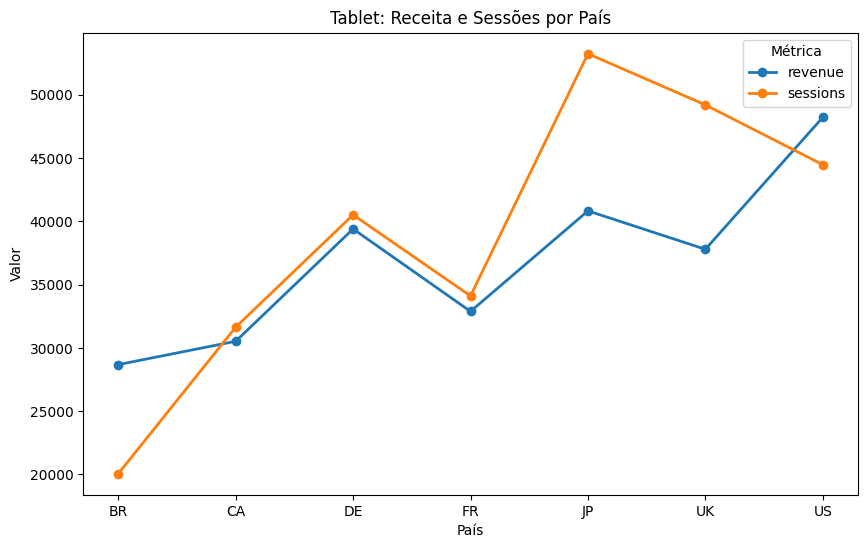

In [94]:
import matplotlib.pyplot as plt  # Correção na importação

# Resetar o índice para transformar 'country' em coluna novamente
tablet_agrupado_reset = tablet_agrupado.reset_index()

# Agora sim podemos usar 'country' no eixo x
tablet_agrupado_reset.plot(
    x='country', 
    y=['revenue', 'sessions'], 
    kind='line', 
    marker='o',
    figsize=(10, 6),
    linewidth=2
)

plt.title('Tablet: Receita e Sessões por País')
plt.xlabel('País')
plt.ylabel('Valor')
# plt.grid(True)
plt.legend(title='Métrica')
plt.show()

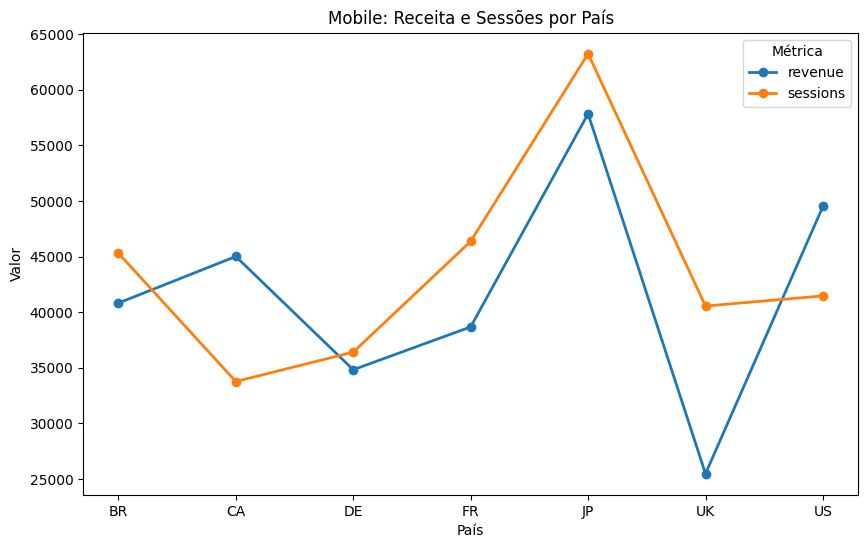

In [95]:
import matplotlib.pyplot as plt  # Correção na importação

# Resetar o índice para transformar 'country' em coluna novamente
mobile_agrupado_reset = mobile_agrupado.reset_index()

# Agora sim podemos usar 'country' no eixo x
mobile_agrupado_reset.plot(
    x='country', 
    y=['revenue', 'sessions'], 
    kind='line', 
    marker='o',
    figsize=(10, 6),
    linewidth=2
)

plt.title('Mobile: Receita e Sessões por País')
plt.xlabel('País')
plt.ylabel('Valor')
# plt.grid(True)
plt.legend(title='Métrica')
plt.show()

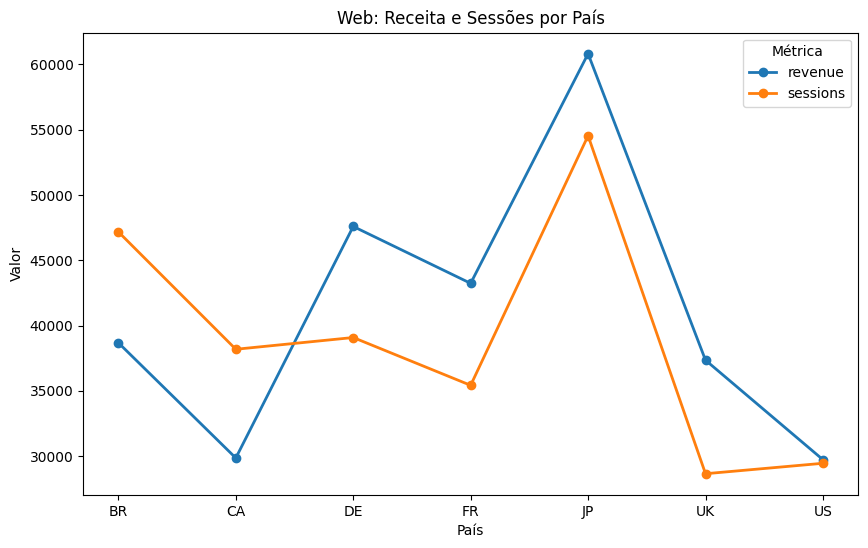

In [96]:
import matplotlib.pyplot as plt  # Correção na importação

# Resetar o índice para transformar 'country' em coluna novamente
web_agrupado_reset = web_agrupado.reset_index()

# Agora sim podemos usar 'country' no eixo x
web_agrupado_reset.plot(
    x='country', 
    y=['revenue', 'sessions'], 
    kind='line', 
    marker='o',
    figsize=(10, 6),
    linewidth=2
)

plt.title('Web: Receita e Sessões por País')
plt.xlabel('País')
plt.ylabel('Valor')
# plt.grid(True)
plt.legend(title='Métrica')
plt.show()

# Regiões lucrativas

agora vamos separar as regiões que foram mais lucrativas e extrair insights.

In [103]:
# Removendo dados de lucros outliers

q1_lucro_baixo = df_clientes_ativos['revenue'].quantile(0.25)
q3_lucro_alto = df_clientes_ativos['revenue'].quantile(0.75)
iqr_lucro = q3_lucro_alto - q1_lucro_baixo

lucro_limite_inferior = q1_lucro_baixo - 1.5 * iqr_lucro
lucro_limite_superior = q3_lucro_alto + 1.5 * iqr_lucro


df_lucro_sem_outliers = df_clientes_ativos[(df_clientes_ativos['revenue'] >= lucro_limite_inferior ) & (df_clientes_ativos['revenue'] <= mobile_limite_superior)]
df_lucro_sem_outliers = df_lucro_sem_outliers.sort_values(by='revenue', ascending=False)
df_lucro_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
780,4735,2026-02-19,1353,1141,4728.02,Tablet,FR,33.4,56
1016,8776,2026-10-13,1928,1783,4727.08,Web,FR,31.7,39
1524,7295,2028-03-04,3604,1593,4722.87,Web,DE,48.3,91
1709,8052,2028-09-05,3720,336,4706.66,Web,US,48.2,143
1192,1614,2027-04-07,3262,2323,4704.99,Tablet,US,56.0,142


In [104]:
df_lucro_sem_outliers= df_lucro_sem_outliers.drop(columns=['client_id', 'date' , 'client_id'])

In [106]:
df_lucro_sem_outliers.drop(columns=['platform_type'])

,sessions,active_users,revenue,country,bounce_rate,page_views
780,1353,1141,4728.02,FR,33.4,56
1016,1928,1783,4727.08,FR,31.7,39
1524,3604,1593,4722.87,DE,48.3,91
1709,3720,336,4706.66,US,48.2,143
1192,3262,2323,4704.99,US,56.0,142
...,...,...,...,...,...,...
416,2376,452,20.36,BR,31.3,46
1480,4001,908,17.99,JP,39.3,118
1123,3562,1219,16.33,BR,40.6,16
812,1257,2219,13.73,DE,33.1,17


In [107]:
lucro_agrupado = df_lucro_sem_outliers.groupby('country').agg({
    'sessions': lambda x: round(x.sum(), 2),           
    'active_users': lambda x: round(x.mean(), 1),      
    'revenue': lambda x: round(x.sum(), 2),            
    'bounce_rate': lambda x: round(x.mode()[0], 1),    
    'page_views': lambda x: round(x.mean(), 0)         
})

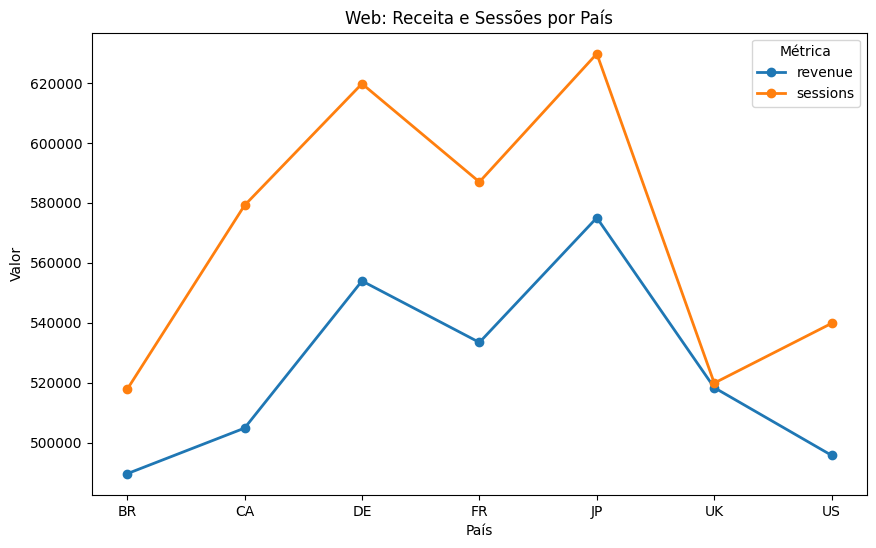

In [108]:
import matplotlib.pyplot as plt  # Correção na importação

lucro_agrupado_reset = lucro_agrupado.reset_index()

lucro_agrupado_reset.plot(
    x='country', 
    y=['revenue', 'sessions'], 
    kind='line', 
    marker='o',
    figsize=(10, 6),
    linewidth=2
)

plt.title('Web: Receita e Sessões por País')
plt.xlabel('País')
plt.ylabel('Valor')
# plt.grid(True)
plt.legend(title='Métrica')
plt.show()